# **Predictive Analysis of BNK48 & CGM48's 16th Single General Election**

![GE4 General Election Banner](GE4banner.jpeg)

*Image Source: [BNK48 Official YouTube Video](https://www.youtube.com/watch?v=4EGrHyXIvf0)*

<a id='top'></a>

# Table of Contents
1. [Introduction to the 48 Group](#1-introduction-to-the-48-group)
2. [Understanding the General Election](#2-understanding-the-general-election)
3. [Data Collection Methodology](#3-data-collection-methodology)
4. [Dataset Overview](#4-dataset-overview)
5. [Exploratory Data Analysis](#5-exploratory-data-analysis)
  - 5.1 [Data Preprocessing](#51-data-preprocessing)
6. [Predictive Model Building](#6-predictive-model-building)
  - 6.1 [GE4_Rank Regression Model](#61-ge4_rank-regression-model)
    - 6.1.1 [Random Forest Regressor](#611-random-forest-regressor)
    - 6.1.2 [Model without GE4 information](#612-model-without-ge4-information)
  - 6.2 [GE4_Position Classification Model](#62-ge4_position-classification-model)
    - 6.2.1 [Random Forest Classifier](#621-random-forest-classifier)
    - 6.2.2 [XGB Classifier](#622-xgboost-classifier)
    - 6.2.3 [LightGBM Classifier](#623-lightgbm-classifier)
    - 6.2.4 [Ensemble](#624-ensemble)
  - 6.3 [Hyperparameter Tuning (Optuna)](#63-hyperparameter-tuning-optuna)
  - 6.4 [Setbatsu Classification Model](#64-setbatsu-classification-model)
7. [Conclusion and Insights](#7-conclusion-and-insights)


## 1. Introduction to the 48 Group

Welcome to the predictive analysis project for the 16th Single General Election of BNK48 and CGM48, the Thai sister groups of the international 48 Group. These idol groups have revolutionized pop culture in Asia, capturing the hearts of fans through music, performances, and interactive fan events.

The 48 Group, which originated in Japan with AKB48, is known for its unique concept of "idols you can meet." The groups have localized sister groups in several countries, each with its own teams of performers. BNK48 and CGM48 are based in Thailand and have garnered a significant following through their engaging performances and public appearances.

## 2. Understanding the General Election

### General Election

The General Election is a hallmark event for 48 Group fans, where supporters vote for their favorite members. The outcome of this event is crucial as it determines the lineup for the next single and often influences the group's direction. Like the 3rd election, BNK48 and CGM48 utilized a blockchain-based token voting system within the iAM48 application for this 4th election, showcasing a blend of pop culture and cutting-edge technology. Preliminary results are announced to the fans at two separate events before the final results, adding to the excitement and speculation about the final rankings.

### Key Terms

- **Senbatsu**: The selected members who will perform the A-side of a single.
- **Coupling Song**: Additional tracks featured on a single, often performed by non-Senbatsu members.
- **Oshi**: A fan's favorite member, akin to a "most supported" idol.
- **Kami**: Derived from "Kamisama" meaning "God," referring to top-ranked idols.
- **Team**: Subgroups within BNK48 and CGM48, each with distinct identities and songs.
- **Center**: The lead position in a group's formation, often front and center during performances.

### Rank
- **Kami7**: The elite top seven idols as determined by fan votes in the general election. These members are considered the most popular and influential within the group.
- **Senbatsu**: The top 16 members selected to perform on the main track of a single, often considered the face of the group during promotions.
- **Under Girls**: Members who rank 17th to 32nd in the general election. They typically perform on the B-side of a single and are featured in secondary promotions.
- **Next Girls**: Ranks 33 to 48 from the election, these members are featured in additional songs and are recognized for their potential and growing popularity.

## 3. Data Collection Methodology

### Data Sources
The data for the analysis of the 3rd and 4th General Elections of BNK48 & CGM48 was meticulously gathered from a combination of online sources on 17 December 2023. The primary sources of data were:

- **Twitter Account [@Stats48TH](https://twitter.com/Stats48TH)**: An unofficial but valuable source providing comprehensive statistics and information on the members of BNK48 and CGM48.
- **Wikipedia Pages**: Detailed historical data and election results were extracted from Wikipedia for the:
  - [3rd General Election for the 12th Single](https://th.wikipedia.org/wiki/การเลือกตั้งทั่วไปเซ็มบัตสึบีเอ็นเคโฟร์ตีเอต_ประจำซิงเกิลที่_12)
  - [4th General Election for the 16th Single](https://th.wikipedia.org/wiki/การเลือกตั้งทั่วไปเซ็มบัตสึบีเอ็นเคโฟร์ตีเอต_ประจำซิงเกิลที่_16)
  
### Data Extraction
The data extraction process encompassed multiple steps to ensure the richness and accuracy of the dataset:

- **Reviewing Twitter Data**: An in-depth analysis of data summaries from the Twitter account was conducted to understand the nuances of the election results and member statistics.
- **Wikipedia Research**: The Wikipedia pages for the 3rd and 4th General Elections were scrutinized to validate and enrich the data obtained from Twitter.
- **Database Analysis**: The `Database members BNK48 & CGM48 (10_12_2023 21.45).xlsx`, provided by @Stats48TH, offered a granular view of the election outcomes and member profiles.
- **Power Query (Get Data)**: Power Query in Microsoft Excel was leveraged to perform data extraction, shaping, and transformation, facilitating the integration of various data sources.

### Data Processing and Model Creation
A comprehensive data processing workflow was adopted to refine the raw data and construct a robust data model:

- **OCR (Optical Character Recognition)**: OCR technology was utilized to digitize images and scanned documents, rendering them into an analyzable format.
- **Data Scraping**: Structured data was scraped from the web, transforming unstructured online information into a usable dataset.
- **Data Cleaning**: The dataset was meticulously cleaned to rectify any inaccuracies and standardize the format, thus ensuring the integrity of the analysis.
- **Data Model Creation in PowerPivot**: The data from various sources was combined using PowerPivot in Excel, which facilitated the creation of a data model that underscores the relationships between different entities. The ER Diagram provided a visual representation of this data model, showcasing how the `GE4rank` table was used as the cornerstone for 'Left Joins' with other tables based on the `Name_Band` attribute.

![ER_Diagram](ER_diagram.png)

### Final Dataset
The culmination of the above processes led to the assembly of the final dataset, which offers a holistic portrayal of the election results and member data. This dataset underpins the exploratory data analysis and predictive modeling executed in this project, aiming to extract meaningful insights and patterns.


## 4. Dataset Overview

This dataset includes detailed statistics from the latest General Election, including votes counted via blockchain technology, member rankings, and various other metrics that could influence the election outcomes.

| Column Name            | Description                                                   | Data Type | Missing | Example Values |
|------------------------|---------------------------------------------------------------|-----------|---------|----------------|
| GE4_Rank               | Rank in the 4th General Election                              | Integer   | 0       | 1, 2, 3 to 64  |
| Name                   | Member's nickname                                             | String    | 0       |                |
| Name_Band              | Combined name and band identifier                             | String    | 0       |                |
| GE4_Token              | Tokens earned in the 4th General Election                     | Float     | 0       |                |
| GE4_Transaction        | Number of transactions in the 4th General Election            | Integer   | 0       |                |
| GE4_Wallet             | Wallet balance during the 4th General Election                | Integer   | 0       |                |
| GE4_Token/Transaction  | Average tokens per transaction in the 4rd GE                  | Float     | 0       |                |
| GE4_Prelim1            | Preliminary round 1 rank in the 4th General Election          | Integer   | 16      |                |
| GE4_Token_Prelim1      | Tokens earned in the preliminary round 1 of the 4th GE        | Float     | 16      |                |
| GE4_Prelim2            | Preliminary round 2 rank in the 4th General Election          | Integer   | 16      |                |
| Band                   | Band name (BNK48 or CGM48)                                    | String    | 0       | BNK48, CGM48   |
| Gen                    | Generation of the member                                      | Integer   | 0       | 1, 2, 3, 4     |
| Band_Gen               | Combined band and generation identifier                       | String    | 0       | BNK48_1, CGM48_2 |
| Full_Name_TH           | Member's full name in Thai                                    | String    | 0       |                |
| Team_Position          | Position within the team                                      | String    | 57      | Captain, Vice Captain, Shihainin |
| Team                   | Team affiliation within the band                              | String    | 0       | BIII, NV, C, Trainee |
| Age                    | Age of the member at the time of 4th General Election         | Integer   | 0       | 20, 21         |
| GE1_Rank               | Rank in the 1st General Election                              | Integer   | 59      |                |
| GE2_Rank               | Rank in the 2nd General Election                              | Integer   | 46      |                |
| GE3_Rank               | Rank in the 3rd General Election                              | Integer   | 22      |                |
| GE3_Position           | Position in the 3rd General Election                          | String    | 23      | Senbatsu, Under Girls, Next Girls, Unranked |
| GE3_Prelim1            | Preliminary round 1 rank in the 3rd General Election          | Integer   | 32      |                |
| GE3_Token_Prelim1      | Tokens earned in the preliminary round 1 of the 3rd GE        | Float     | 32      |                |
| GE3_Prelim2            | Preliminary round 2 rank in the 3rd General Election          | Integer   | 34      |                |
| GE3_Token              | Tokens earned in the 3rd General Election                     | Float     | 34      |                |
| GE3_Transactions       | Number of transactions in the 3rd General Election            | Integer   | 23      |                |
| GE3_Wallet             | Wallet balance during the 3rd General Election                | Integer   | 23      |                |
| GE3_Token/Transaction  | Average tokens per transaction in the 3rd GE                  | Float     | 23      |                |
| GE3_Center             | Whether the member was the center in the 3rd GE (1 for center)| Integer   | 0       | 0, 1           |
| Request_Hour           | Total number of times participation in the Request Hour Concert | Integer | 0       | 1, 2, 3        |
| Game_Caster            | Total number of times participation in the 48TH Game Caster   | Integer   | 0       | 1, 2, 3        |
| Theater_Stage          | Number of times performed on the theater stage                | Integer   | 0       |                |
| iAM48_Kami             | Number of 'Kami' (only supporter) in the iAM48 platform       | Integer   | 0       |                || Column 
| iAM48_Oshi             | Number of 'Oshi' (supporter) in the iAM48 platform               | Integer   | 0       |                     |
| iAM48_Cookies          | Number of cookies received in the iAM48 platform                 | Integer   | 0       |                     |
| iAM48_Likes            | Number of likes received in the iAM48 platform                   | Integer   | 0       |                     |
| Setbatsu_Total         | Total number of times being in the Senbatsu lineup before 4th GE | Integer   | 0       |                     |
| Center_Main_Total      | Total number of times being the main center before 4th GE        | Integer   | 0       |                     |
| GE4_Position           | Position in the 4th General Election                             | String    | 0       | Senbatsu, Under Girls, Next Girls, Unranked |


In [1]:
# Import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, cross_val_predict
from sklearn.base import clone
import xgboost as xgb
import lightgbm as lgb
import optuna

In [2]:
# Load data into dataframe
df = pd.read_excel('BNK48_CGM48_df.xlsx')

In [3]:
# Set the option to display all columns (None means no limit to the number of columns)
pd.set_option('display.max_columns', None)

# Set the option to display up to 64 rows
#pd.set_option('display.max_rows', 64)

In [4]:
df.head()

,GE4_Rank,Name,Name_Band,GE4_Token,GE4_Transaction,GE4_Wallet,GE4_Token/Transaction,GE4_Prelim1,GE4_Token_Prelim1,GE4_Prelim2,Band,Gen,Band_Gen,Full_Name_TH,Team_Position,Team,Age,GE1_Rank,GE2_Rank,GE3_Rank,GE3_Position,GE3_Prelim1,GE3_Token_Prelim1,GE3_Prelim2,GE3_Token,GE3_Transactions,GE3_Wallet,GE3_Token/Transaction,GE3_Center,Request_Hour,Game_Caster,Theater_Stage,iAM48_Kami,iAM48_Oshi,iAM48_Cookies,iAM48_Likes,Setbatsu_Total,Center_Main_Total,GE4_Position
0,1,Pim,Pim_CGM48,133891.5231,1023,570,130.881254,4.0,5590.69,1.0,CGM48,1,CGM48_1,พรวารินทร์ วงศ์ตระกูลกิจ,NaN,C,17,NaN,22.0,5.0,Senbatsu,5.0,5838.43,5.0,59433.96,513.0,129.0,115.86,False,2,6,0,918,12670,17831388,94093,9,1,Senbatsu
1,2,Paeyah,Paeyah_BNK48,110223.6325,841,459,131.062583,5.0,4159.38,5.0,BNK48,3,BNK48_3,นิพพิชฌาน์ พิพิธเดชา,NaN,NV,18,NaN,NaN,24.0,Under Girls,26.0,1001.39,20.0,9752.89,1194.0,382.0,8.17,False,3,0,56,1657,16731,8486508,60637,4,1,Senbatsu
2,3,Kaning,Kaning_CGM48,99316.8750,967,526,102.706179,2.0,10419.31,2.0,CGM48,1,CGM48_1,วิทิตา สระศรีสม,NaN,C,19,NaN,40.0,6.0,Senbatsu,3.0,7309.99,6.0,53234.80,2369.0,929.0,22.47,False,3,27,0,3101,31554,27935669,183438,11,3,Senbatsu
3,4,Minmin,Minmin_BNK48,72812.5690,557,281,130.722745,3.0,6017.28,8.0,BNK48,2,BNK48_2,รชยา ทัพพ์คุณานนต์,NaN,BIII,26,19.0,14.0,10.0,Senbatsu,9.0,5102.41,8.0,36102.21,1166.0,393.0,30.06,False,5,2,148,1404,45844,26256835,182763,9,0,Senbatsu
4,5,Pancake,Pancake_BNK48,52589.7200,484,266,108.656446,28.0,1069.53,21.0,BNK48,3,BNK48_3,พิทยาภรณ์ เกียรติฐิตินันท์,NaN,NV,16,NaN,NaN,43.0,Next Girls,33.0,854.55,38.0,3667.27,737.0,235.0,4.98,False,3,5,43,714,13133,10090840,63289,3,1,Senbatsu


In [5]:
#df.to_csv('BNK48_CGM48_df.csv', index=False)

## 5. Exploratory Data Analysis

In [6]:
import sweetviz as sv

# Analyzing the dataset
#report = sv.analyze(df)

# Generating the report
#report.show_notebook()

In [7]:
# Getting a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GE4_Rank               64 non-null     int64  
 1   Name                   64 non-null     object 
 2   Name_Band              64 non-null     object 
 3   GE4_Token              64 non-null     float64
 4   GE4_Transaction        64 non-null     int64  
 5   GE4_Wallet             64 non-null     int64  
 6   GE4_Token/Transaction  64 non-null     float64
 7   GE4_Prelim1            48 non-null     float64
 8   GE4_Token_Prelim1      48 non-null     float64
 9   GE4_Prelim2            48 non-null     float64
 10  Band                   64 non-null     object 
 11  Gen                    64 non-null     int64  
 12  Band_Gen               64 non-null     object 
 13  Full_Name_TH           64 non-null     object 
 14  Team_Position          7 non-null      object 
 15  Team    

In [8]:
# Descriptive statistics of the dataframe
df.describe()

,GE4_Rank,GE4_Token,GE4_Transaction,GE4_Wallet,GE4_Token/Transaction,GE4_Prelim1,GE4_Token_Prelim1,GE4_Prelim2,Gen,Age,GE1_Rank,GE2_Rank,GE3_Rank,GE3_Prelim1,GE3_Token_Prelim1,GE3_Prelim2,GE3_Token,GE3_Transactions,GE3_Wallet,GE3_Token/Transaction,Request_Hour,Game_Caster,Theater_Stage,iAM48_Kami,iAM48_Oshi,iAM48_Cookies,iAM48_Likes,Setbatsu_Total,Center_Main_Total
count,64.000000,64.000000,64.000000,64.000000,64.000000,48.00,48.000000,48.00,64.000000,64.000000,5.000000,18.000000,42.000000,32.000000,32.000000,30.000000,41.000000,41.000000,41.000000,41.000000,64.000000,64.000000,64.000000,64.000000,64.00000,6.400000e+01,64.000000,64.000000,64.000000
mean,32.500000,19369.981492,406.390625,236.296875,38.888322,24.50,2082.308958,24.50,2.250000,19.812500,18.400000,31.166667,35.928571,27.281250,1844.875937,27.466667,9637.234878,844.951220,268.146341,10.878537,2.093750,7.453125,32.421875,1002.046875,17805.96875,9.757608e+06,91762.609375,3.406250,0.250000
std,18.618987,25935.246469,246.527864,119.313736,33.622831,14.00,2273.912177,14.00,1.112697,3.318419,3.577709,11.617684,16.609420,13.006783,1870.861349,13.299555,12764.762065,465.911792,183.300377,17.662012,1.610666,7.700607,48.688125,1624.024429,17443.28327,7.494040e+06,74172.456294,3.499291,0.590937
min,1.000000,209.760000,127.000000,104.000000,1.514676,1.00,352.640000,1.00,1.000000,14.000000,13.000000,8.000000,5.000000,3.000000,360.160000,5.000000,298.710000,247.000000,39.000000,0.910000,0.000000,0.000000,0.000000,34.000000,1898.00000,5.090910e+05,7869.000000,0.000000,0.000000
25%,16.750000,5372.644250,247.250000,156.500000,18.039122,12.75,858.705000,12.75,1.000000,17.000000,17.000000,22.750000,22.250000,18.250000,622.935000,18.250000,3108.140000,474.000000,129.000000,5.210000,0.000000,0.000000,0.000000,213.750000,5641.50000,3.964677e+06,40691.750000,0.000000,0.000000
50%,32.500000,8443.286500,359.500000,208.000000,28.312180,24.50,1294.235000,24.50,2.000000,20.000000,19.000000,32.500000,37.500000,28.000000,961.020000,29.500000,5008.460000,711.000000,230.000000,7.110000,2.000000,5.500000,0.000000,515.500000,11151.00000,8.526086e+06,66718.000000,2.500000,0.000000
75%,48.250000,24685.510250,434.000000,266.000000,44.556560,36.25,2535.347500,36.25,3.000000,21.250000,21.000000,39.750000,48.750000,37.500000,2007.862500,37.750000,9877.980000,1130.000000,391.000000,10.820000,3.000000,13.000000,52.750000,1085.750000,24190.25000,1.336809e+07,131324.750000,5.250000,0.000000
max,64.000000,133891.523100,1149.000000,581.000000,131.062583,48.00,11375.590000,48.00,4.000000,28.000000,22.000000,48.000000,62.000000,48.000000,7309.990000,48.000000,59433.960000,2369.000000,929.000000,115.860000,6.000000,27.000000,174.000000,11315.000000,93145.00000,2.793567e+07,380536.000000,12.000000,3.000000


### 5.1 Data Preprocessing

#### Dropping Columns
- **Identifier Columns:** `Name`, `Name_Band`, `Full_Name_TH`
- **Redundant or Less Significant Columns:** `Gen`, `GE3_Position`, `GE3_Prelim1`, `GE3_Token_Prelim1`, `GE3_Prelim2`
- **Post-Outcome Variables:** Excluded `GE4_Token`, `GE4_Transaction`, `GE4_Wallet`, `GE4_Token/Transaction` because these features are only known after the rank is announced and their inclusion would lead to data leakage.

#### Feature Engineering
- **Band_Gen_Team:** To capture the hierarchical relationship (Band > Generation > Team), created a custom encoding by concatenating `Band`, `Gen`, and `Team`. Applied Label Encoding to this new column and then dropped the individual `Band`, `Gen`, `Team`, and `Band_Gen` columns.
- **GE1_Par & GE2_Par:** Converted `GE1_Rank` and `GE2_Rank` into binary participation columns (`GE1_Par`, `GE2_Par`) and dropped the original columns.
- **GE3_Center & Team_Position:** Converted to binary format.

#### Missing Data Imputation
- Imputed `GE3_Rank`, `GE4_Prelim1`, and `GE4_Prelim2` with max rank + 1 (max rank assumed to be 48).
- Imputed `GE4_Token_Prelim1`, `GE3_Token`, `GE3_Transactions`, `GE3_Wallet`, `GE3_Token/Transaction` with their respective minimum values.

#### Scaling
- Applied `StandardScaler` to the following columns:
  - `GE4_Token_Prelim1`
  - `Age`
  - `GE3_Token`, `GE3_Transactions`, `GE3_Wallet`, `GE3_Token/Transaction`
  - `Request_Hour`, `Game_Caster`, `Theater_Stage`
  - `iAM48_Kami`, `iAM48_Oshi`, `iAM48_Cookies`, `iAM48_Likes`
  - `Setbatsu_Total`, `Center_Main_Total`

#### Data Type Conversion
- Converted `GE4_Prelim1`, `GE4_Prelim2`, and `GE3_Rank` to integer type.

In [9]:
# Keep 'Name_Band' for later column join
name_df = df[['GE4_Rank', 'Name_Band']]

# Dropping identifier columns
df = df.drop(['Name', 'Name_Band', 'Full_Name_TH'], axis=1)

# Dropping columns where significance is included in other columns
df = df.drop(['GE3_Position', 'GE3_Prelim1', 'GE3_Token_Prelim1', 'GE3_Prelim2'], axis=1)

# Drop the post-outcome variables columns that should not be used for prediction to prevent data leakage
df = df.drop(['GE4_Token', 'GE4_Transaction', 'GE4_Wallet', 'GE4_Token/Transaction'], axis=1)

# Concatenating the original 'Band', 'Gen', and 'Team' columns
df['Band_Gen_Team'] = df['Band'] + "_" + df['Gen'].astype(str) + "_" + df['Team']

# Applying Label Encoding to the new 'Band_Gen_Team' column
label_encoder = LabelEncoder()
df['Band_Gen_Team_Encoded'] = label_encoder.fit_transform(df['Band_Gen_Team'])

# Optionally, dropping the original columns if they are no longer needed
df.drop(['Band', 'Gen', 'Team', 'Band_Gen_Team', 'Band_Gen'], axis=1, inplace=True)

# Converting GE1_Rank and GE2_Rank to binary participation columns
df['GE1_Par'] = df['GE1_Rank'].notna().astype(int)
df['GE2_Par'] = df['GE2_Rank'].notna().astype(int)
df = df.drop(['GE1_Rank', 'GE2_Rank'], axis=1)

# Imputing missing data for specific columns
max_rank = 48  # max rank is 48
df['GE3_Rank'].fillna(max_rank + 1, inplace=True)
df['GE4_Prelim1'].fillna(max_rank + 1, inplace=True)
df['GE4_Prelim2'].fillna(max_rank + 1, inplace=True)
df['GE4_Token_Prelim1'].fillna(df['GE4_Token_Prelim1'].min(), inplace=True)
df['GE3_Token'].fillna(df['GE3_Token'].min(), inplace=True)
df['GE3_Transactions'].fillna(df['GE3_Transactions'].min(), inplace=True)
df['GE3_Wallet'].fillna(df['GE3_Wallet'].min(), inplace=True)
df['GE3_Token/Transaction'].fillna(df['GE3_Token/Transaction'].min(), inplace=True)

# Converting GE3_Center and Team_Position to binary
df['GE3_Center'] = df['GE3_Center'].notna().astype(int)
df['Team_Position'] = df['Team_Position'].notna().astype(int)

# Changing data types to integer
df['GE4_Prelim1'] = df['GE4_Prelim1'].astype(int)
df['GE4_Prelim2'] = df['GE4_Prelim2'].astype(int)
df['GE3_Rank'] = df['GE3_Rank'].astype(int)

# Columns to preprocess with StandardScaler
columns_to_scale = [
    'GE4_Token_Prelim1',
    'Age',
    'GE3_Token', 'GE3_Transactions', 'GE3_Wallet', 'GE3_Token/Transaction',
    'Request_Hour', 'Game_Caster', 'Theater_Stage',
    'iAM48_Kami', 'iAM48_Oshi','iAM48_Cookies', 'iAM48_Likes',
    'Setbatsu_Total', 'Center_Main_Total'
]

# Applying StandardScaler to specified columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [10]:
df.head()

,GE4_Rank,GE4_Prelim1,GE4_Token_Prelim1,GE4_Prelim2,Team_Position,Age,GE3_Rank,GE3_Token,GE3_Transactions,GE3_Wallet,GE3_Token/Transaction,GE3_Center,Request_Hour,Game_Caster,Theater_Stage,iAM48_Kami,iAM48_Oshi,iAM48_Cookies,iAM48_Likes,Setbatsu_Total,Center_Main_Total,GE4_Position,Band_Gen_Team_Encoded,GE1_Par,GE2_Par
0,1,4,1.887696,1,0,-0.854242,5,4.813914,-0.250728,-0.312240,7.355500,1,-0.058666,-0.190194,-0.671173,-0.052161,-0.296766,1.085877,0.031667,1.611175,1.279204,Senbatsu,6,0,1
1,2,5,1.202079,5,0,-0.550512,24,0.314422,1.207858,1.078625,0.059210,1,0.567103,-0.975513,0.488097,0.406478,-0.062114,-0.170956,-0.422956,0.171019,1.279204,Senbatsu,4,0,0
2,3,2,4.200672,2,0,-0.246781,6,4.252471,3.724507,4.085752,1.028073,1,0.567103,2.558421,-0.671173,1.302656,0.794387,2.444845,1.245747,2.187237,4.690416,Senbatsu,6,0,1
3,4,3,2.092039,8,0,1.879333,10,2.700815,1.147886,1.139097,1.542316,1,1.818642,-0.713740,2.392612,0.249461,1.620089,2.219051,1.236575,1.611175,-0.426401,Senbatsu,1,1,1
4,5,28,-0.278001,21,0,-1.157973,43,-0.236737,0.229042,0.270494,-0.156922,1,0.567103,-0.321081,0.218980,-0.178768,-0.270013,0.044818,-0.386919,-0.117013,1.279204,Senbatsu,4,0,0


### Column Types Post-Preprocessing
- **Continuous Variables:** `GE4_Token`, `GE4_Transaction`, `GE4_Wallet`, `GE4_Token/Transaction`, `GE4_Token_Prelim1`, `GE3_Token`, `GE3_Transactions`, `GE3_Wallet`, `GE3_Token/Transaction`, `Request_Hour`, `Game_Caster`, `Theater_Stage`, `iAM48_Kami`, `iAM48_Oshi`, `iAM48_Cookies`, `iAM48_Likes`, `Setbatsu_Total`, `Center_Main_Total`, `Age`
- **Binary Variables:** `GE1_Par`, `GE2_Par`, `GE3_Center`, `Team_Position`
- **Categorical Variables:** `Band_Gen_Team` (derived from original `Band`, `Gen` and `Team`)
- **Original Variables:** `GE4_Rank`, `GE4_Prelim1`, `GE4_Prelim2`, and `GE3_Rank`

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GE4_Rank               64 non-null     int64  
 1   GE4_Prelim1            64 non-null     int64  
 2   GE4_Token_Prelim1      64 non-null     float64
 3   GE4_Prelim2            64 non-null     int64  
 4   Team_Position          64 non-null     int64  
 5   Age                    64 non-null     float64
 6   GE3_Rank               64 non-null     int64  
 7   GE3_Token              64 non-null     float64
 8   GE3_Transactions       64 non-null     float64
 9   GE3_Wallet             64 non-null     float64
 10  GE3_Token/Transaction  64 non-null     float64
 11  GE3_Center             64 non-null     int64  
 12  Request_Hour           64 non-null     float64
 13  Game_Caster            64 non-null     float64
 14  Theater_Stage          64 non-null     float64
 15  iAM48_Ka

## 6. Predictive Model Building

### Model Selection

#### Understanding the Data Complexity
After careful analysis and consideration of the dataset, which involves predicting `GE4_Rank` and `GE4_Position`, it's evident that the relationships within this data are not linear, but rather complex and multifaceted. This complexity arises from several factors:

- **Multidimensional Influences:** The ranks and positions are likely influenced by a diverse set of factors, including popularity metrics, engagement levels, and performance metrics. These factors interact with each other in non-linear ways.
- **Non-Linear Patterns:** Preliminary exploratory data analysis (EDA) suggests that the relationships between features and the target variables (`GE4_Rank` and `GE4_Position`) do not follow a straightforward linear pattern.

### Choosing Suitable Models
Given the non-linear nature of the data, models that can capture and leverage these complex relationships are required. Therefore, the following models have been selected for their ability to handle non-linearity effectively:

- **Random Forest:** Known for its robustness and versatility, Random Forest can capture complex interactions between features without the need for linear assumptions. It's also effective in handling different types of data and scales.
- **XGBoost and LightGBM:** These gradient boosting frameworks are renowned for their high performance, especially in dealing with non-linear and complex datasets. They offer advanced capabilities for feature handling and fine-tuning, making them suitable for capturing the intricate patterns present in the data.

### Conclusion
The decision to utilize Random Forest, XGBoost, and LightGBM is based on their superiority in handling non-linear and complex relationships, which is essential for accurately modeling and predicting `GE4_Rank` and `GE4_Position` in this dataset. This approach is expected to yield more accurate and reliable predictions compared to linear models.


In [12]:
# Separating features and target variables for both models
X = df.drop(['GE4_Rank', 'GE4_Position'], axis=1)
y_rank = df['GE4_Rank']
y_position = df['GE4_Position']

In [13]:
# Define function
def evaluate_model(model, X, y, cv_method, scoring='neg_mean_squared_error'):
    """Evaluate a model using cross-validation and return RMSE scores."""
    scores = cross_val_score(model, X, y, cv=cv_method, scoring=scoring)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

def plot_feature_importances(model, feature_names):
    """Plot feature importances of a model with annotations."""
    importances = model.feature_importances_
    indices = np.argsort(importances)
    bars = plt.barh(range(len(importances)), importances[indices], color='b', align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importances')

    # Annotate the bars with the feature importance numbers
    for bar in bars:
        plt.text(
            bar.get_width(),       # x-coordinate position for text
            bar.get_y() + bar.get_height() / 2,  # y-coordinate position for text
            f'{bar.get_width():.3f}',  # text (rounded to 3 decimal places)
            va='center',  # vertical alignment
            ha='left'     # horizontal alignment
        )

    plt.tight_layout()
    plt.show()

def perform_loocv_and_plot(model, X, y, plot_title='Actual vs. Predicted Values'):
    """Perform Leave-One-Out Cross-Validation and plot actual vs predicted values."""
    from sklearn.model_selection import LeaveOneOut
    from sklearn.metrics import r2_score
    import matplotlib.pyplot as plt

    loocv = LeaveOneOut()
    actuals, predictions = [], []

    for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        actuals.append(y_test.iloc[0])
        predictions.append(pred[0])

    r2 = r2_score(actuals, predictions)
    
    plt.scatter(actuals, predictions, alpha=0.7, color='blue', label='Predictions')
    plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r', label='Perfect Prediction')
    plt.text(50, 5, f'R² score: {r2:.2f}', color='green', ha='center')
    plt.title(plot_title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

    return r2  # Optionally return the R² score

### 6.1 `GE4_Rank` Regression Model

#### 6.1.1 Random Forest Regressor

##### K-Fold Cross-Validation

In [14]:
# Initialize the model
rf_regressor = RandomForestRegressor(random_state=42)

# K-Fold Cross-Validation
kf_rmse_scores = evaluate_model(rf_regressor, X, y_rank, KFold(n_splits=5, shuffle=True, random_state=42))
print("K-Fold RMSE:", np.mean(kf_rmse_scores))

K-Fold RMSE: 9.469145356019995


##### Leave-One-Out Cross-Validation (LOOCV)

In [15]:
# Initialize the model
rf_regressor = RandomForestRegressor(random_state=42)

# Leave-One-Out Cross-Validation
loocv_rmse_scores = evaluate_model(rf_regressor, X, y_rank, LeaveOneOut())
print("LOOCV RMSE:", np.mean(loocv_rmse_scores))

LOOCV RMSE: 7.22140625


In the process of evaluating the Random Forest Regressor model for predicting `GE4_Rank`, two cross-validation techniques were considered: K-Fold Cross-Validation and Leave-One-Out Cross-Validation (LOOCV). After conducting both methods, a decision was made to prefer LOOCV based on the analysis results.

#### Comparative Analysis
- **K-Fold Cross-Validation Results:**
  - Produced a range of RMSE scores: [7.22, 10.67, 10.71, 11.24, 7.50].
  - Average RMSE: 9.47.
  - Showed variability in model performance across different folds.

- **LOOCV Results:**
  - Generated individual RMSE scores for each data point, reflecting model performance on each instance.
  - Average RMSE: 7.22.
  - Offered a more detailed and comprehensive assessment of the model’s performance.

##### Reasons for Preferring LOOCV
1. **Lower Average RMSE:** LOOCV exhibited a lower average RMSE of 7.22 compared to 9.47 from K-Fold Cross-Validation, suggesting a better overall model fit.
2. **Granular Analysis:** LOOCV provided insights into the model's performance on every single data point, which is crucial for small datasets such as ours with 64 rows.
3. **Comprehensive Evaluation:** The small size of our dataset makes LOOCV's approach of using each instance as a validation set exactly once particularly effective, ensuring a thorough evaluation of the model.
4. **Handling Small Datasets:** LOOCV is especially suitable for small datasets, as it maximizes the use of available data for training and validation, reducing the risk of bias in the model assessment.

Given the detailed and comprehensive nature of the evaluation provided by LOOCV, along with its lower average RMSE, it was chosen as the preferred method for validating the Random Forest Regressor model in this context. This choice aligns with the need for an accurate and thorough understanding of the model's performance on a small dataset.


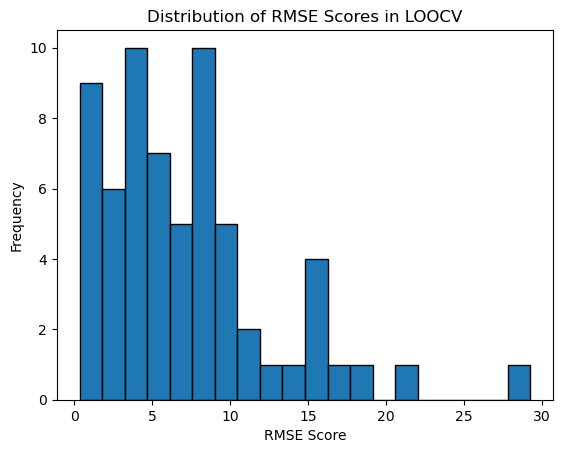

In [16]:
# Distribution of RMSE Scores
# loocv_rmse_scores contains the RMSE for each instance
plt.hist(loocv_rmse_scores, bins=20, edgecolor='black')
plt.title('Distribution of RMSE Scores in LOOCV')
plt.xlabel('RMSE Score')
plt.ylabel('Frequency')
plt.show()

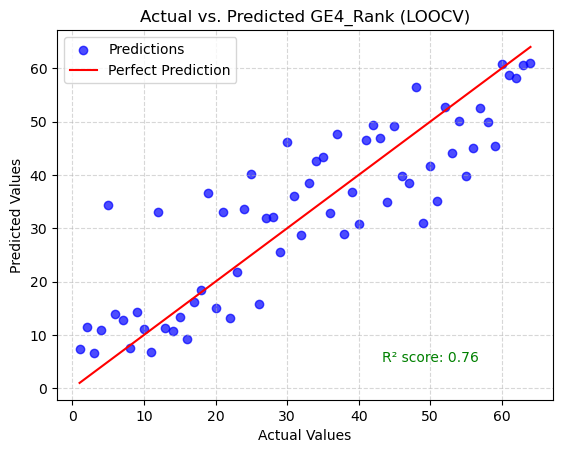

In [17]:
# Plotting Actual vs Predicted values
model = RandomForestRegressor(random_state=42)
r2_score = perform_loocv_and_plot(model, X, y_rank, 'Actual vs. Predicted GE4_Rank (LOOCV)')

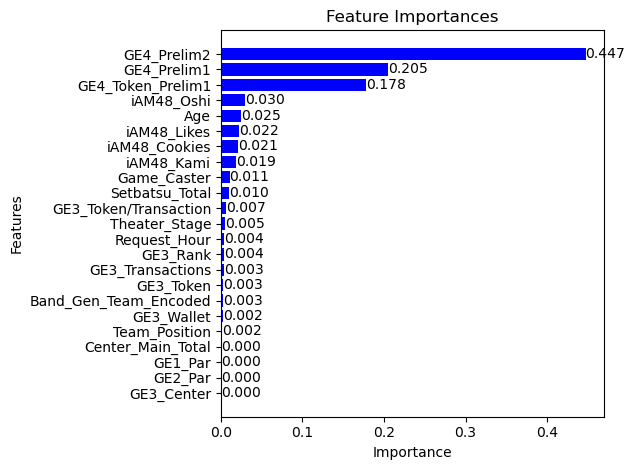

In [18]:
# Feature Importance Plot
rf_regressor.fit(X, y_rank)
plot_feature_importances(rf_regressor, X.columns)

In [19]:
# Predict the ranks for the entire dataset
predicted_ranks = model.predict(X)

# Then, we create a DataFrame that holds both the actual and predicted ranks
rank_comparison = pd.DataFrame({
    'Actual Rank': y_rank,
    'Predicted Rank': predicted_ranks
})

rank_comparison.merge(name_df, left_on='Actual Rank', right_on='GE4_Rank').sort_values('Predicted Rank').reset_index(drop=True).drop(['GE4_Rank'], axis=1)

,Actual Rank,Predicted Rank,Name_Band
0,1,3.52,Pim_CGM48
1,3,4.37,Kaning_CGM48
2,2,5.45,Paeyah_BNK48
3,4,6.39,Minmin_BNK48
4,8,8.03,Wee_BNK48
...,...,...,...
59,60,59.56,Berry_BNK48
60,61,59.95,Wawa_BNK48
61,62,60.25,Papang_CGM48
62,64,61.07,Ginna_CGM48


#### 6.1.2 Model without GE4 information

Next, I will create the model but not include the any information about GE4 which are `GE4_Prelim1`, `GE4_Token_Prelim1`, `GE4_Prelim2`	

In [20]:
# Update the feature matrix X
X_noGE4 = df.drop(['GE4_Rank', 'GE4_Position','GE4_Prelim1', 'GE4_Token_Prelim1', 'GE4_Prelim2'], axis=1)

In [29]:
# Best parameters from Optuna
best_params = {
    'n_estimators': 247,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'log2',
    'bootstrap': False
}

# Initialize the model with the best parameters
rf_regressor = RandomForestRegressor(random_state=42, **best_params)

# Leave-One-Out Cross-Validation
loocv_rmse_scores = evaluate_model(rf_regressor, X_noGE4, y_rank, LeaveOneOut())
print("LOOCV RMSE:", np.mean(loocv_rmse_scores))

LOOCV RMSE: 11.18438976045884


In [ ]:
#def objective(trial):
#    # Define the hyperparameters to tune
#    param = {
#        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#        'max_depth': trial.suggest_int('max_depth', 5, 30),
#        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
#        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
#        'max_samples': trial.suggest_uniform('max_samples', 0.5, 1.0) if trial.suggest_categorical('bootstrap', [True, False]) else None
#        # You can add more hyperparameters here
#    }
#    
#    # Initialize the RandomForestRegressor with the suggested hyperparameters
#    rf_regressor = RandomForestRegressor(random_state=42, **param)
#    
#    # LOOCV as the cross-validation method
#    loocv = LeaveOneOut()
#    
#    # Compute the cross-validated RMSE (negative mean squared error)
#    scores = cross_val_score(rf_regressor, X_noGE4, y_rank, cv=loocv, scoring='neg_mean_squared_error', n_jobs=-1)
#    rmse_scores = np.sqrt(-scores)
#    
#    # Return the mean RMSE score
#    return np.mean(rmse_scores)
#
## Create a study object and specify the direction to minimize the RMSE
#study = optuna.create_study(direction='minimize')
#
## Execute the optimization
#study.optimize(objective, n_trials=100)  # Adjust the number of trials based on computational resources
#
## Output the best hyperparameters
#best_params = study.best_params
#print('Best parameters:', best_params)

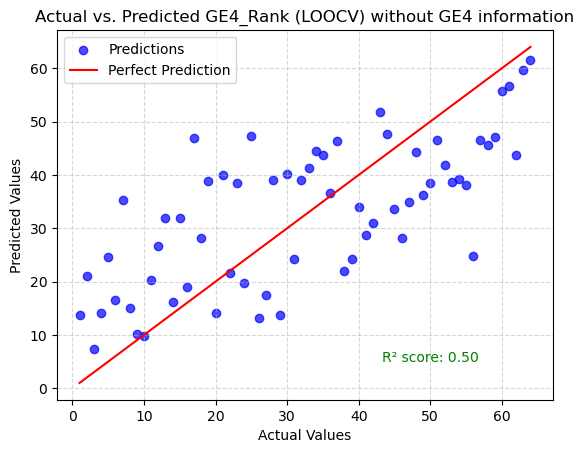

In [30]:
# Plotting Actual vs Predicted values
r2_score = perform_loocv_and_plot(rf_regressor, X_noGE4, y_rank, 'Actual vs. Predicted GE4_Rank (LOOCV) without GE4 information')

The scatter plot for Actual vs. Predicted GE4 Rank based on the Leave-One-Out Cross-Validation (LOOCV) without GE4 information displays a moderate R² score of 0.50. This indicates that the model explains about 50% of the variability in the ranking outcome

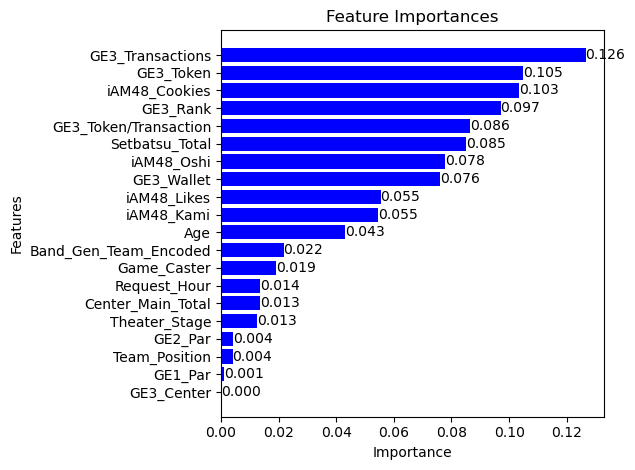

In [31]:
# Feature Importance Plot
rf_regressor.fit(X_noGE4, y_rank)
plot_feature_importances(rf_regressor, X_noGE4.columns)

`Age` is quite high in the feature importance, So I want to know is the higher or lower will effect the rank.

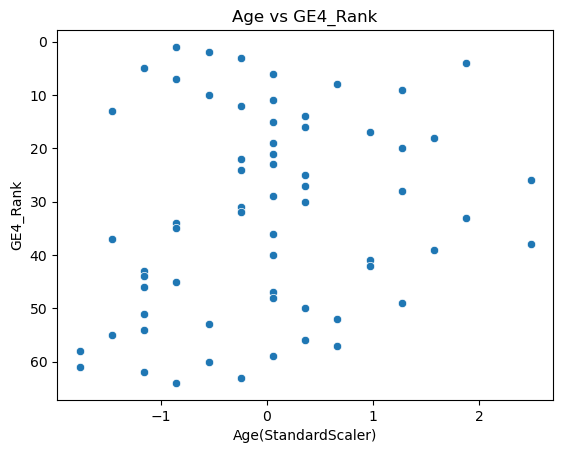

-0.22325025384235472

In [32]:
# Plotting Age vs GE4_Rank
sns.scatterplot(x='Age', y='GE4_Rank', data=df)
plt.title('Age vs GE4_Rank')
plt.xlabel('Age(StandardScaler)')
plt.ylabel('GE4_Rank')
plt.gca().invert_yaxis()  # Inverting y-axis for better interpretation of ranks (lower is better)
plt.show()

# Calculating the correlation coefficient
age_rank_corr = df['Age'].corr(df['GE4_Rank'])
age_rank_corr

A correlation coefficient of approximately -0.223 between `Age` and `GE4_Rank` indicates a weak negative correlation. This suggests that as Age increases, `GE4_Rank` tends to be slightly lower (which means better, since in ranking systems lower numbers indicate better ranks). However, the correlation is not strong, indicating that `Age` is not a major determinant of GE4_Rank in this dataset.

In [34]:
# Predict the ranks for the entire dataset
predicted_ranks = rf_regressor.predict(X_noGE4)

# Then, we create a DataFrame that holds both the actual and predicted ranks
rank_comparison = pd.DataFrame({
    'Actual Rank': y_rank,
    'Predicted Rank': predicted_ranks
})

rank_comparison.merge(name_df, left_on='Actual Rank', right_on='GE4_Rank').sort_values('Predicted Rank').reset_index(drop=True).drop(['GE4_Rank'], axis=1)

,Actual Rank,Predicted Rank,Name_Band
0,3,4.140351,Kaning_CGM48
1,1,4.448718,Pim_CGM48
2,4,5.078947,Minmin_BNK48
3,2,5.245951,Paeyah_BNK48
4,6,8.104251,Sita_CGM48
...,...,...,...
59,60,59.909244,Berry_BNK48
60,61,60.442308,Wawa_BNK48
61,62,60.907557,Papang_CGM48
62,63,62.497976,Emma_CGM48


### 6.2 `GE4_Position` Classification Model

#### 6.2.1 Random Forest Classifier


In [26]:
# Encode the target variable
label_encoder = LabelEncoder()
y_position_encoded = label_encoder.fit_transform(df['GE4_Position'])

In [27]:
# Define your desired order of class labels
order_labels = ['Senbatsu', 'Under Girls', 'Next Girls', 'Unranked']

# Get the indices of the desired order from the label encoder
order_indices = label_encoder.transform(order_labels)

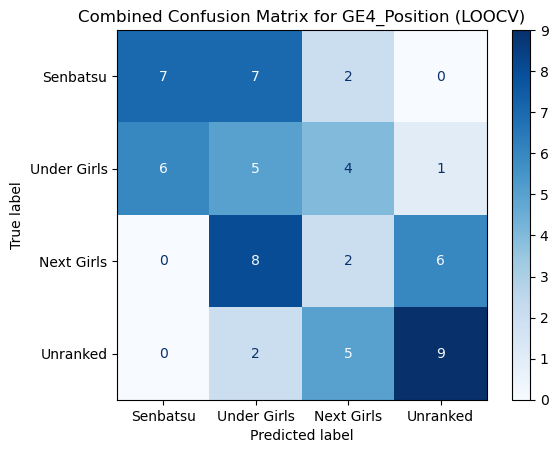

Average LOOCV Accuracy with Random Forest Classifier: 0.359375


In [28]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Leave-One-Out Cross-Validation
loocv = LeaveOneOut()

# Lists to store metrics and confusion matrices
accuracies = []
conf_matrices = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loocv.split(X_noGE4):
    X_train, X_test = X_noGE4.iloc[train_index], X_noGE4.iloc[test_index]
    y_train, y_test = y_position_encoded[train_index], y_position_encoded[test_index]

    # Fit the model
    rf_classifier.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

    # Generate and store confusion matrix for the current split
    cm = confusion_matrix(y_test, y_pred, labels=order_indices)
    conf_matrices.append(cm)

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Combine individual confusion matrices into one
combined_conf_matrix = np.sum(conf_matrices, axis=0)

# Display the combined confusion matrix with your desired order of labels
disp = ConfusionMatrixDisplay(
    confusion_matrix=combined_conf_matrix,
    display_labels=order_labels
)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Combined Confusion Matrix for GE4_Position (LOOCV)')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

# Print the average accuracy
print(f"Average LOOCV Accuracy with Random Forest Classifier: {average_accuracy}")


#### 6.2.2 XGBoost Classifier


/Users/Vitchakorn/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


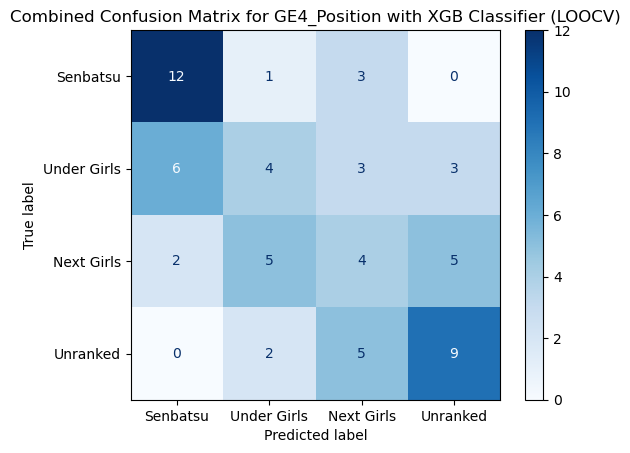

Average LOOCV Accuracy with XGB Classifier: 0.453125


In [29]:
# Best hyperparameters from Optuna 0.453125
xgb_params = {
    'n_estimators': 62,
    'max_depth': 8,
    'learning_rate': 0.11114923496035016,
    'subsample': 0.9499659309339268,
    'colsample_bytree': 0.5098434893993684,
    'gamma': 1.7185116077799458,
    'reg_alpha': 0.0007889051898621077,
    'reg_lambda': 0.012575505023707996,
    'min_child_weight': 5,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss'
}

# Initialize the XGB Classifier
xgb_classifier = xgb.XGBClassifier(**xgb_params)

# Initialize Leave-One-Out Cross-Validation
loocv = LeaveOneOut()

# Lists to store metrics
accuracies = []
conf_matrices = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loocv.split(X_noGE4):
    X_train, X_test = X_noGE4.iloc[train_index], X_noGE4.iloc[test_index]
    y_train, y_test = y_position_encoded[train_index], y_position_encoded[test_index]

    # Fit the model
    xgb_classifier.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = xgb_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

    # Generate and store confusion matrix for the current split
    cm = confusion_matrix(y_test, y_pred, labels=order_indices)
    conf_matrices.append(cm)

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Combine individual confusion matrices into one
combined_conf_matrix = np.sum(conf_matrices, axis=0)

# Display the combined confusion matrix with your desired order of labels
disp = ConfusionMatrixDisplay(
    confusion_matrix=combined_conf_matrix,
    display_labels=order_labels
)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Combined Confusion Matrix for GE4_Position with XGB Classifier (LOOCV)')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

# Print the average accuracy
print(f"Average LOOCV Accuracy with XGB Classifier: {average_accuracy}")

<a id='6-2-3'></a>

#### 6.2.3 LightGBM Classifier

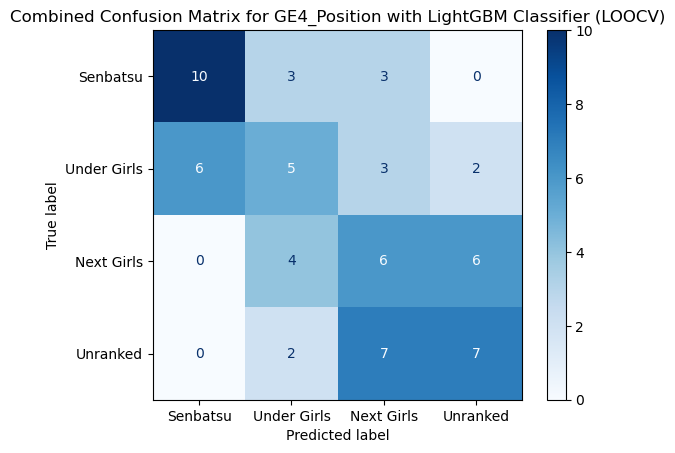

Average LOOCV Accuracy with LightGBM Classifier: 0.4375


In [30]:
import warnings
# Filter warnings from LightGBM
warnings.filterwarnings("ignore", category=UserWarning, module='lightgbm')

# Best hyperparameters from Optuna 0.4375
lgb_params = {
    'num_leaves': 248,
    'max_bin': 266,
    'learning_rate': 0.15297900573465156,
    'n_estimators': 709,
    'min_child_samples': 15,
    'reg_alpha': 0.002360620140726983,
    'reg_lambda': 1.9803948970125714e-07,
    'feature_fraction': 0.40139259945588734,
    'bagging_fraction': 0.5397045180218129,
    'bagging_freq': 2,
    'min_child_weight': 3,
    'random_state': 42,
    'verbose': -1
}

# Initialize the LightGBM Classifier with the best parameters
lgb_classifier = lgb.LGBMClassifier(**lgb_params)

# Initialize Leave-One-Out Cross-Validation
loocv = LeaveOneOut()

# Lists to store metrics
accuracies = []
conf_matrices = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loocv.split(X_noGE4):
    X_train, X_test = X_noGE4.iloc[train_index], X_noGE4.iloc[test_index]
    y_train, y_test = y_position_encoded[train_index], y_position_encoded[test_index]

    # Fit the model
    lgb_classifier.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = lgb_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

    # Generate and store confusion matrix for the current split
    cm = confusion_matrix(y_test, y_pred, labels=order_indices)
    conf_matrices.append(cm)

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Combine individual confusion matrices into one
combined_conf_matrix = np.sum(conf_matrices, axis=0)

# Display the combined confusion matrix with your desired order of labels
disp = ConfusionMatrixDisplay(
    confusion_matrix=combined_conf_matrix,
    display_labels=order_labels
)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Combined Confusion Matrix for GE4_Position with LightGBM Classifier (LOOCV)')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

# Print the average accuracy
print(f"Average LOOCV Accuracy with LightGBM Classifier: {average_accuracy}")

<a id='6-2-4'></a>

#### 6.2.4 Ensemble

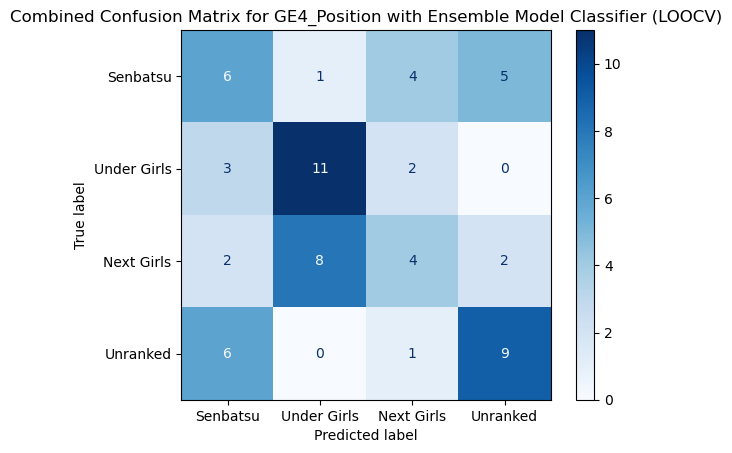

Average LOOCV Accuracy with Ensemble: 0.46875


In [31]:
# Suppress all types of warnings
warnings.filterwarnings('ignore')

# Initialize Leave-One-Out Cross-Validation
loocv = LeaveOneOut()

# Lists to store the accuracies
ensemble_accuracies = []

# Initialize an empty matrix with dimensions [number of classes, number of classes]
number_of_classes = len(np.unique(y_position_encoded))
combined_conf_matrix = np.zeros((number_of_classes, number_of_classes), dtype=int)


# Perform LOOCV
for train_index, test_index in loocv.split(X_noGE4):
    X_train, X_test = X_noGE4.iloc[train_index], X_noGE4.iloc[test_index]
    y_train, y_test = y_position_encoded[train_index], y_position_encoded[test_index]

    # Clone the models to ensure fresh models for each loop iteration
    clf1 = clone(xgb_classifier)
    clf2 = clone(lgb_classifier)

    # Fit the models
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)

    # Predict probabilities
    probas1 = clf1.predict_proba(X_test)
    probas2 = clf2.predict_proba(X_test)

    # Average the probabilities for ensemble prediction
    averaged_probas = (probas1 + probas2) / 2
    ensemble_pred = np.argmax(averaged_probas, axis=1)

    # Calculate and store the accuracy
    ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
    ensemble_accuracies.append(ensemble_accuracy)

    # Use 'ensemble_pred' for calculating the confusion matrix
    cm = confusion_matrix(y_test, ensemble_pred, labels=np.unique(y_position_encoded))
    combined_conf_matrix += cm

# After the loop, ensure the sum equals the number of instances
assert combined_conf_matrix.sum() == len(y_position_encoded), "The combined confusion matrix does not match the number of instances."

# Now you can proceed to display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=combined_conf_matrix, display_labels=order_labels)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Combined Confusion Matrix for GE4_Position with Ensemble Model Classifier (LOOCV)')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

# Calculate the average accuracy over all LOOCV runs
average_ensemble_accuracy = np.mean(ensemble_accuracies)
print(f"Average LOOCV Accuracy with Ensemble: {average_ensemble_accuracy}")

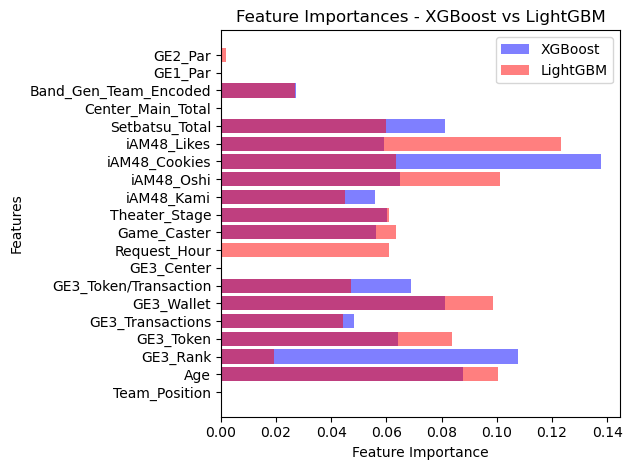

In [ ]:
# Fit the XGB Classifier
xgb_classifier.fit(X_noGE4, y_position_encoded)
# Get feature importances from XGB
xgb_importances = xgb_classifier.feature_importances_

# Fit the LightGBM Classifier
lgb_classifier.fit(X_noGE4, y_position_encoded)
# Get feature importances from LightGBM
lgb_importances = lgb_classifier.feature_importances_

# Normalize the LightGBM importances to sum up to 1 like XGBoost
lgb_importances_normalized = lgb_importances / lgb_importances.sum()

# Number of features
n_features = X_noGE4.shape[1]

# Creating plot
fig, ax = plt.subplots()

# Setting the positions for the bars
pos = np.arange(n_features)

# Plotting XGB feature importances
ax.barh(pos, xgb_importances, align='center', alpha=0.5, color='blue', label='XGBoost')

# Plotting LightGBM feature importances on the same axis
ax.barh(pos, lgb_importances_normalized, align='center', alpha=0.5, color='red', label='LightGBM')

# Adding features names as labels
ax.set_yticks(pos)
ax.set_yticklabels(X_noGE4.columns)

# Adding legend for both classifiers
ax.legend(['XGBoost', 'LightGBM'], loc='upper right')

# Adding title and labels
ax.set_title('Feature Importances - XGBoost vs LightGBM')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')

# Show plot
plt.tight_layout()
plt.show()

### 6.3 Hyperparameter Tuning (Optuna)

#### 6.3.1 Optuna for XGM

In [32]:
#def objective(trial):
#    # Define the hyperparameters to be tuned
#    params = {
#        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#        'max_depth': trial.suggest_int('max_depth', 3, 15),
#        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
#        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
#        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 100.0),
#        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 100.0),
#        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#        'verbosity': 0,  # Set verbosity to silent
#        'use_label_encoder': False,
#        'eval_metric': 'mlogloss',
#        'random_state': 42
#    }
#
#    # Create an XGBClassifier with the suggested parameters
#    model = xgb.XGBClassifier(**params)
#
#    # Initialize Leave-One-Out Cross-Validation
#    loocv = LeaveOneOut()
#
#    # List to store accuracy of each fold
#    accuracies = []
#
#    # Perform Leave-One-Out Cross-Validation
#    for train_idx, test_idx in loocv.split(X_noGE4):
#        X_train, X_test = X_noGE4.iloc[train_idx], X_noGE4.iloc[test_idx]
#        y_train, y_test = y_position_encoded[train_idx], y_position_encoded[test_idx]
#
#        # Fit the model
#        model.fit(X_train, y_train)
#
#        # Make predictions and evaluate
#        y_pred = model.predict(X_test)
#        accuracies.append(accuracy_score(y_test, y_pred))
#
#    # Calculate average accuracy over all folds
#    average_accuracy = np.mean(accuracies)
#
#    return average_accuracy
#
## Create an Optuna study and optimize the objective
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=100)
#
## Output the results
#print('Best trial:', study.best_trial)
#print('Best parameters:', study.best_trial.params)


#### 6.3.2 Optuna for LightGBM

In [33]:
#def objective(trial):
#    # Define the hyperparameter configuration space
#    param = {
#        'objective': 'multiclass',
#        'metric': 'multi_logloss',
#        'verbosity': -1,
#        'boosting_type': 'gbdt',
#        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
#        'max_bin': trial.suggest_int('max_bin', 200, 300),
#        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
#        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
#        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
#        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
#        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
#        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
#    }
#
#    # Create the model with the suggested parameters
#    model = lgb.LGBMClassifier(**param)
#
#    # Initialize Leave-One-Out Cross-Validation
#    loocv = LeaveOneOut()
#    accuracies = []
#
#    # Perform Leave-One-Out Cross-Validation
#    for train_index, test_index in loocv.split(X_noGE4):
#        X_train, X_test = X_noGE4.iloc[train_index], X_noGE4.iloc[test_index]
#        y_train, y_test = y_position_encoded[train_index], y_position_encoded[test_index]
#
#        # Fit the model
#        model.fit(X_train, y_train)
#
#        # Predict and evaluate
#        y_pred = model.predict(X_test)
#        accuracies.append(accuracy_score(y_test, y_pred))
#
#    # Calculate average accuracy
#    average_accuracy = np.mean(accuracies)
#
#    return average_accuracy
#
## Create a study object and optimize the objective function
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=100)  # Adjust n_trials based on your computational resources
#
## Best trial
#trial = study.best_trial
#print('Accuracy: {}'.format(trial.value))
#print("Best hyperparameters: {}".format(trial.params))

### 6.4 `Setbatsu` Classification Model

In [34]:
# Convert 'GE4_Position' into a binary classification problem: 1 for 'Senbatsu', 0 for others
y_senbatsu = (y_position == 'Senbatsu').astype(int)

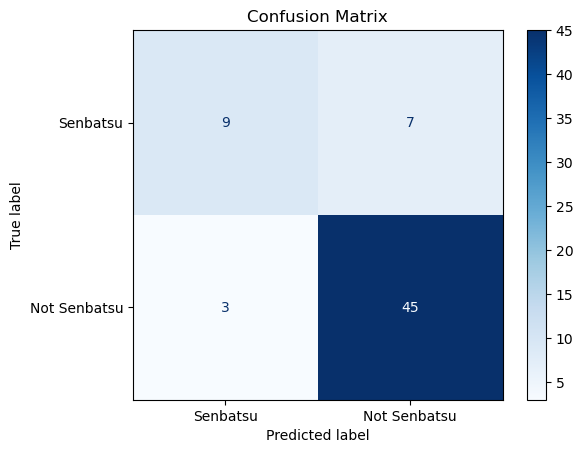

Accuracy: 0.84375


In [35]:
# Best parameters from Optuna
best_xgb_senbatsu_params = {
    'booster': 'gbtree',
    'lambda': 1.5729484366914301,
    'alpha': 0.0035588382002629962,
    'subsample': 0.7519424474240746,
    'colsample_bytree': 0.6149074359177604,
    'max_depth': 3,
    'min_child_weight': 2,
    'learning_rate': 0.02217344684807915,
    'n_estimators': 84,
    'gamma': 0.022543595047388173,
    'scale_pos_weight': 1.0002016056596796,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

# Initialize the XGBoost classifier with the best parameters
xgb_setbatsu = xgb.XGBClassifier(**best_xgb_senbatsu_params)

# Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()

# Perform leave-one-out cross-validation
predictions = cross_val_predict(xgb_setbatsu, X_noGE4, y_senbatsu, cv=loocv, method="predict")

# Calculate accuracy
accuracy = accuracy_score(y_senbatsu, predictions)

# Calculate the confusion matrix with reversed class order
conf_matrix = confusion_matrix(y_senbatsu, predictions, labels=[1, 0])

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=['Senbatsu', 'Not Senbatsu']).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix to predict Senbatsu")
plt.show()

print("Accuracy:", accuracy)

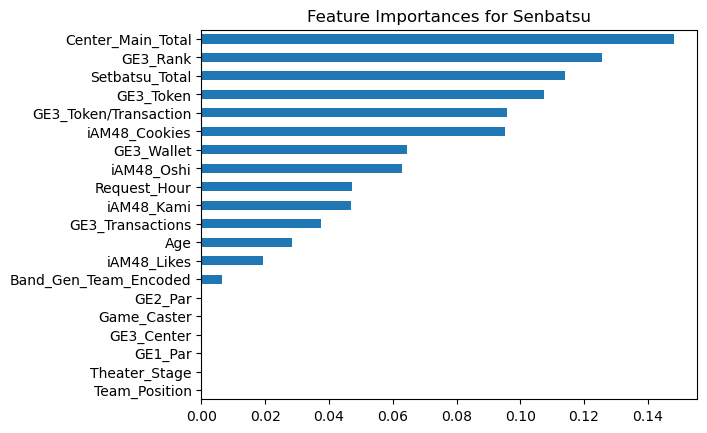

In [40]:
# Fit the model with your data
xgb_setbatsu.fit(X_noGE4, y_senbatsu)

# Get feature importances
feature_importances = xgb_setbatsu.feature_importances_

# Create a pandas series to make plotting easier
import pandas as pd
features = pd.Series(feature_importances, index=X_noGE4.columns)

# Plotting
features.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances for Senbatsu')
plt.show()

In [38]:
# Define the objective function to optimize
#def objective(trial):
#    # Hyperparameters to be tuned by Optuna
#    param = {
#        'verbosity': 0,
#        'objective': 'binary:logistic',
#        'eval_metric': 'logloss',
#        'use_label_encoder': False,
#        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
#        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
#        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
#        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#        'max_depth': trial.suggest_int('max_depth', 3, 12),
#        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
#        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
#        'gamma': trial.suggest_loguniform('gamma', 1e-3, 10.0),
#        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 1, 100),
#    }
#    
#    # Initialize the XGBoost classifier with the hyperparameters
#    xgb_setbatsu = xgb.XGBClassifier(**param)
#    
#    # LOOCV as cross-validation strategy
#    loocv = LeaveOneOut()
#    
#    # Perform LOOCV and obtain the mean score
#    scores = cross_val_score(xgb_setbatsu, X_noGE4, y_senbatsu, cv=loocv, scoring='accuracy', n_jobs=-1)
#    mean_score = scores.mean()
#    
#    return mean_score
#
## Create a study object and specify the direction is 'maximize'
#study = optuna.create_study(direction='maximize')
#
## Execute an optimization by using the above 'objective' function
#study.optimize(objective, n_trials=100)
#
## Best hyperparameters
#best_params = study.best_params
#print('Best parameters:', best_params)
#
## Train the XGBoost classifier with the best hyperparameters
#xgb_setbatsu = xgb.XGBClassifier(**best_params)
#xgb_setbatsu.fit(X_noGE4, y_senbatsu)


## 7. Conclusion and Insights

The feature importance analysis for predicting `Senbatsu` status in the context of BNK48 and CGM48 general elections provides several key insights:

### Top Features:

- **Center_Main_Total:** This feature's high importance suggests that members who have frequently been the center or main feature in performances or promotional activities are more likely to be in 'Senbatsu'. This might indicate that popularity and visibility play crucial roles in selection.

- **GE3_Rank:** The previous election rank appears to be a strong predictor, implying that past success is a good indicator of future outcomes. It may reflect a consistent fan base or sustained performance that influences subsequent elections.

- **Setbatsu_Total:** The cumulative measure of past 'Senbatsu' selections highlights the importance of historical inclusion in 'Senbatsu' groups, possibly due to established popularity or recognition within the community.

### Other Notable Features:

- **GE3_Token and GE3_Token/Transaction:** These metrics likely relate to the voting system's mechanics, indicating that members with higher token counts or more efficient transaction rates (tokens per transaction) have better chances. This could point to a well-organized fan campaign or greater fan dedication.

- **iAM48_Cookies, iAM48_Oshi, and iAM48_Likes:** Features related to the iAM48 application suggest that engagement and support within the app can significantly impact a member's chances of being in 'Senbatsu'. This might be due to direct voting through the app or as a proxy for overall fan engagement.

### Insights:
- **Historical Performance Matters:** The importance of historical data (like previous ranks and selections) suggests that there is an element of inertia in 'Senbatsu' selections, where past performance can heavily influence future outcomes.

- **Fan Engagement Is Key:** Features related to fan engagement and support metrics are critical, implying that active and dedicated fan bases are essential for a member to secure a 'Senbatsu' spot.

- **Visibility and Popularity:** Being in the limelight, as suggested by 'Center_Main_Total', can significantly boost a member's prospects, which might encourage strategies aimed at increasing member visibility to fans.

### Considerations for Further Analysis:

- **Correlation vs. Causation:** While feature importance provides a measure of correlation with the target variable, it does not establish causation. Further causal analysis could be helpful in understanding the true drivers behind 'Senbatsu' selections.

- **Data Limitations:** The model's insights are as good as the data it learns from. It's essential to consider the limitations of the dataset and whether it encompasses all factors that could influence the outcome.

- **Model Refinement:** The insights from this analysis could be used to refine the predictive model further, possibly by focusing on the most relevant features or exploring feature engineering to capture more nuanced relationships.